In [2]:
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

def setwd():
    PROJROOT = os.path.join(os.path.abspath(''), '..')
    os.chdir(PROJROOT)
    print(f'Working directory set to {os.getcwd()}')
    return None

setwd()

Working directory set to /home/vgonzenb/abcd


In [3]:
df = pd.read_csv('mean_bold_by_stimuli.csv')
df

,Stimulus,Block,Order,subject,CEREBELLUM_LEFT,THALAMUS_LEFT,CAUDATE_LEFT,PUTAMEN_LEFT,PALLIDUM_LEFT,BRAIN_STEM,...,DIENCEPHALON_VENTRAL_LEFT,CEREBELLUM_RIGHT,THALAMUS_RIGHT,CAUDATE_RIGHT,PUTAMEN_RIGHT,PALLIDUM_RIGHT,HIPPOCAMPUS_RIGHT,AMYGDALA_RIGHT,ACCUMBENS_RIGHT,DIENCEPHALON_VENTRAL_RIGHT
0,PosFace,2-Back,1.0,NDARINVNKNMHEML,3.071459,-1.292313,4.892605,6.521870,-13.427094,4.763988,...,9.238358,1.870013,-7.531348,4.300508,2.908728,1.964831,4.397277,5.842288,18.489046,-3.460905
1,NeutFace,0-Back,2.0,NDARINVNKNMHEML,1.484858,-1.056057,0.996859,-2.786982,-1.265913,-2.313565,...,2.949666,-2.610298,2.157505,1.609457,-3.079566,-5.554940,-2.123664,-3.924386,-3.199689,-1.099140
2,NegFace,2-Back,3.0,NDARINVNKNMHEML,1.192081,2.064631,-5.067684,2.956904,-0.142832,-1.988440,...,-7.779178,3.558382,-5.660439,-6.651146,-2.910573,-3.861739,0.478147,-0.508270,2.813104,-2.591045
3,PosFace,0-Back,4.0,NDARINVNKNMHEML,3.422818,1.453167,-1.184822,2.565681,1.280187,-4.178939,...,-3.110703,4.288521,2.705443,-0.294267,4.185900,3.384911,2.896517,7.067500,-3.445930,-0.770186
4,Place,0-Back,5.0,NDARINVNKNMHEML,-4.314524,-4.042534,-1.525096,-3.419527,6.424696,-2.677712,...,-5.940345,-6.580763,1.520455,2.069324,2.077955,4.074668,2.492005,4.296730,-0.759131,-2.491029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,NeutFace,2-Back,12.0,NDARINVT48MJ3F9,3.078581,-1.617950,-0.005222,-5.336761,1.716423,-0.692926,...,-2.800331,5.246609,-3.856539,-2.516924,-4.717097,1.053302,-5.481446,-6.591968,-3.399476,-0.662926
895,NegFace,0-Back,13.0,NDARINVT48MJ3F9,1.959980,1.091329,-1.963028,-1.883480,-2.721695,0.700729,...,0.379761,2.787469,3.009974,-1.485357,-1.341604,-1.053186,4.949796,0.521218,3.087622,0.466270
896,Place,0-Back,14.0,NDARINVT48MJ3F9,-0.743900,-1.940114,-2.083580,-1.172595,2.639399,-1.628302,...,-0.015868,1.569062,-4.244956,-1.943466,-3.736004,-2.311102,-3.113725,-4.317794,-5.995718,-2.238646
897,PosFace,2-Back,15.0,NDARINVT48MJ3F9,-1.011803,0.742282,-4.165920,-4.182531,-0.817623,1.741875,...,3.534486,2.989469,-0.114105,-7.106038,-4.255371,-1.568647,0.752537,-1.750692,1.093784,-1.117132


In [4]:
df.columns

Index(['Stimulus', 'Block', 'Order', 'subject', 'CEREBELLUM_LEFT',
       'THALAMUS_LEFT', 'CAUDATE_LEFT', 'PUTAMEN_LEFT', 'PALLIDUM_LEFT',
       'BRAIN_STEM', 'HIPPOCAMPUS_LEFT', 'AMYGDALA_LEFT', 'ACCUMBENS_LEFT',
       'DIENCEPHALON_VENTRAL_LEFT', 'CEREBELLUM_RIGHT', 'THALAMUS_RIGHT',
       'CAUDATE_RIGHT', 'PUTAMEN_RIGHT', 'PALLIDUM_RIGHT', 'HIPPOCAMPUS_RIGHT',
       'AMYGDALA_RIGHT', 'ACCUMBENS_RIGHT', 'DIENCEPHALON_VENTRAL_RIGHT'],
      dtype='object')

In [5]:
print(f'N={len(df.subject.unique())}')

N=57


In [8]:
!mkdir -p results/figures

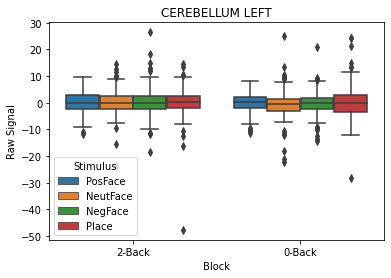

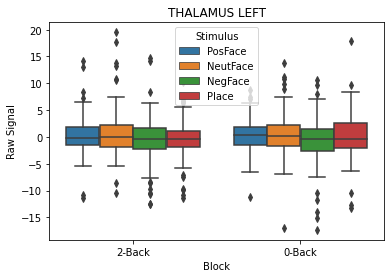

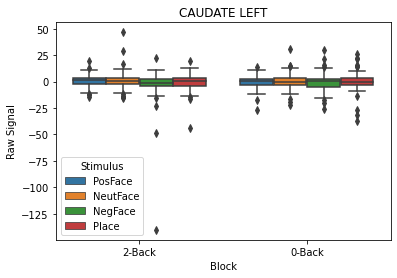

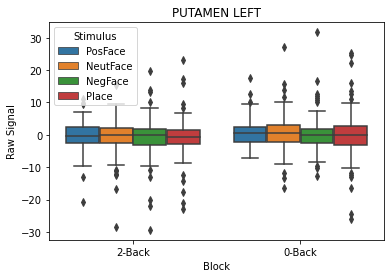

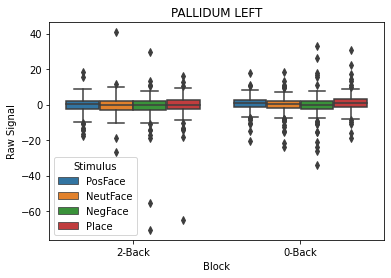

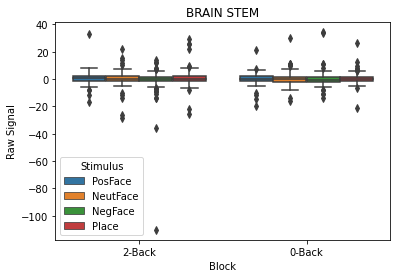

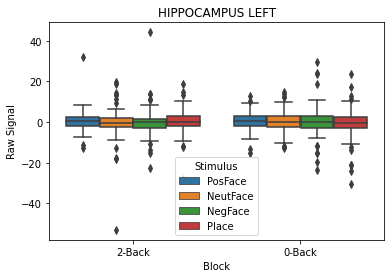

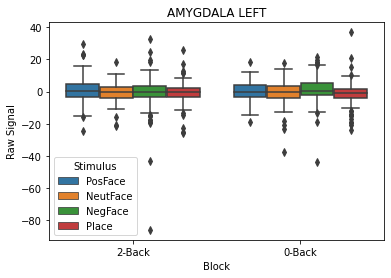

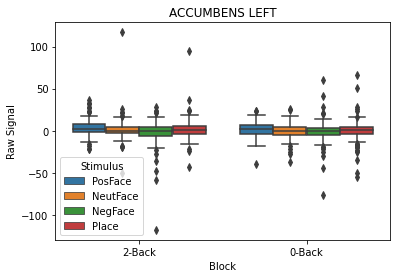

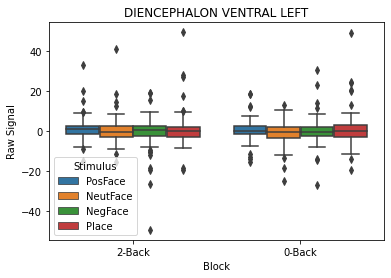

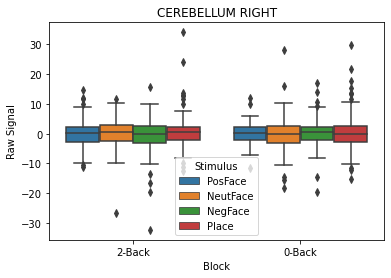

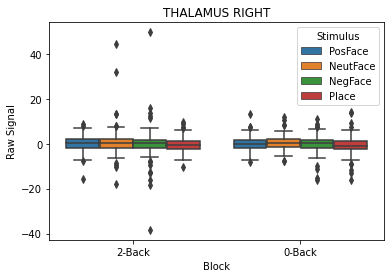

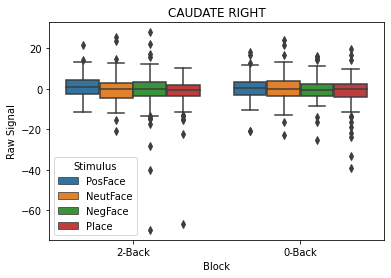

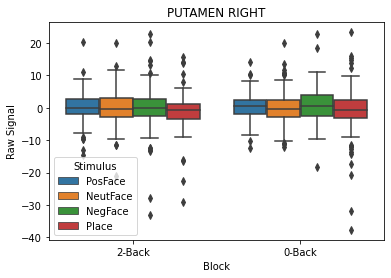

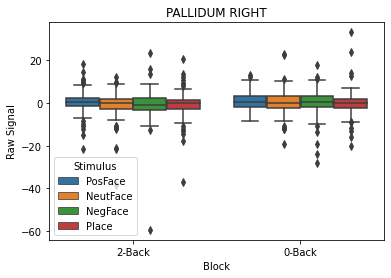

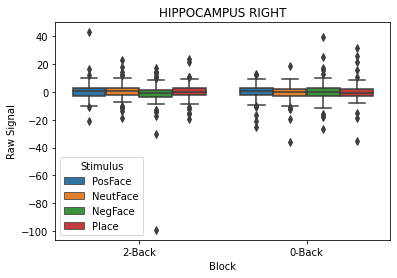

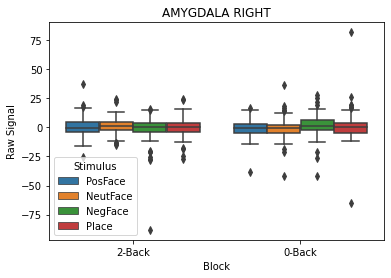

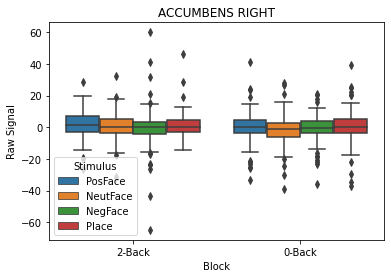

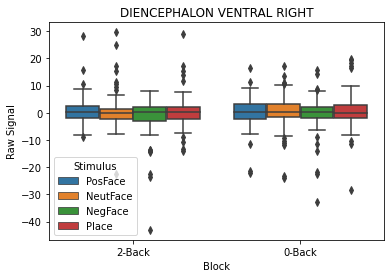

<Figure size 432x288 with 0 Axes>

In [16]:
for col in df.columns[5:]:
    sns.boxplot(x='Block', y=col, hue='Stimulus', data=df).set(title=col.replace('_', ' '), ylabel='Raw Signal')
    plt.savefig(f'results/figures/nback_{col}.png')
    plt.show()

First vs Last stimuli comparison

In [11]:
rank = df.groupby(['subject', 'Stimulus'])['Order'].rank('dense')
df.insert(3, 'Rank', rank)


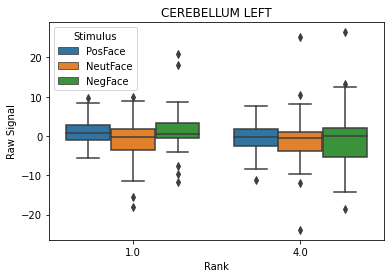

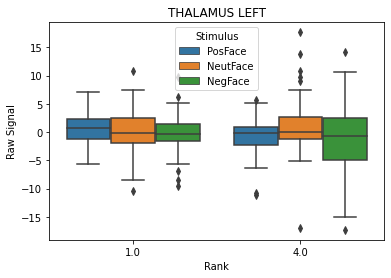

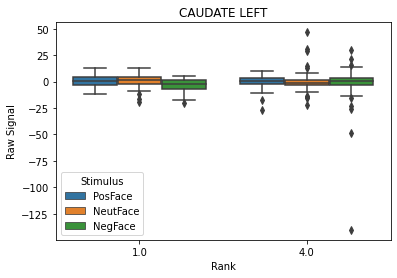

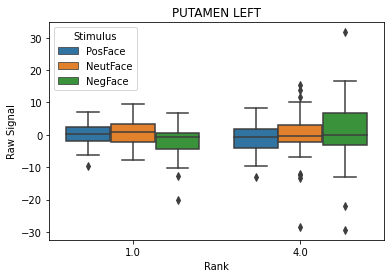

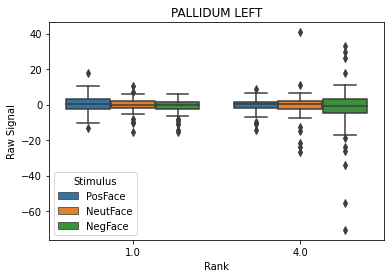

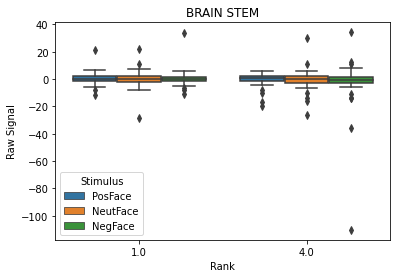

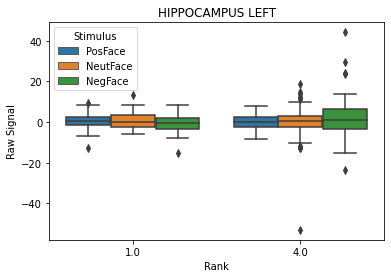

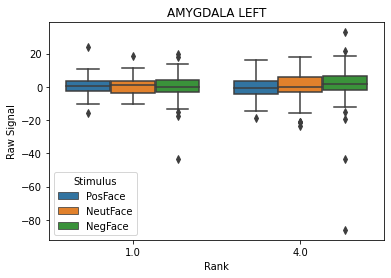

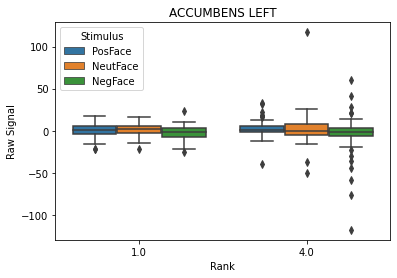

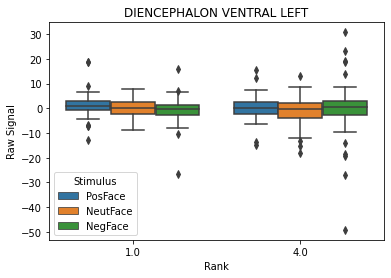

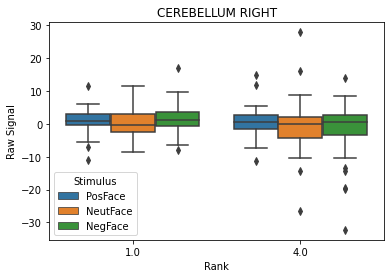

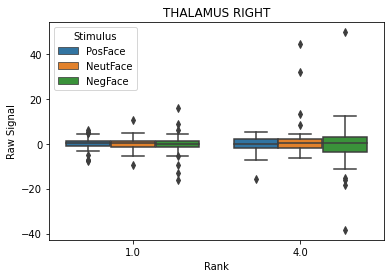

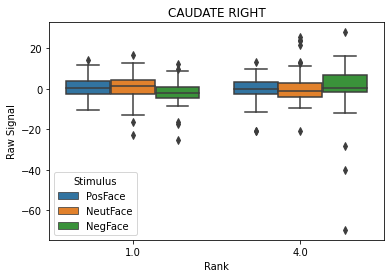

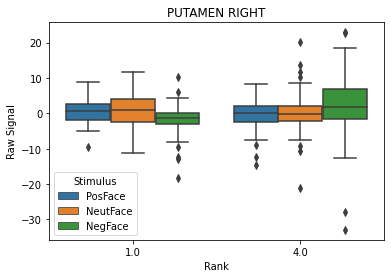

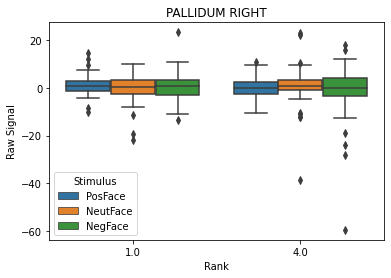

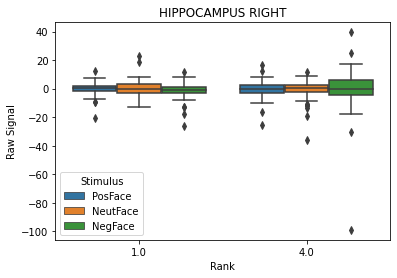

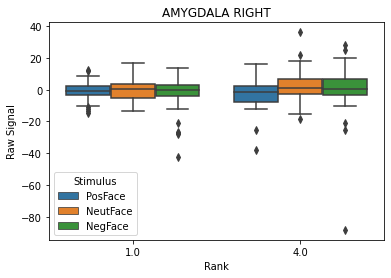

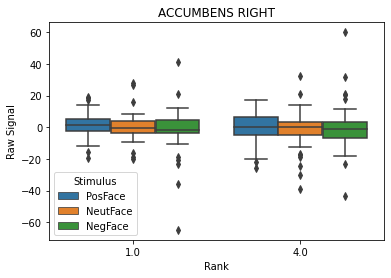

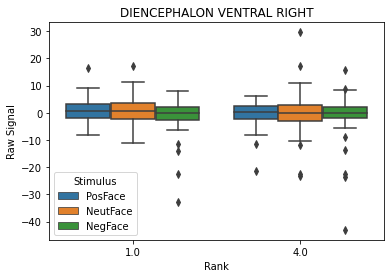

<Figure size 432x288 with 0 Axes>

In [17]:
data = df[((df.Rank == 1) | (df.Rank == 4)) & (df.Stimulus.isin(['PosFace', 'NegFace', 'NeutFace']))]
for col in df.columns[5:]:
    sns.boxplot(x='Rank', y=col, hue='Stimulus', data=data).set(title=col.replace('_', ' '), ylabel='Raw Signal')
    plt.savefig(f'results/figures/1st_v_4th_{col}.png')
    plt.show()
    